CA02: This is a eMail Spam Classifers that uses Naive Bayes supervised machine learning algorithm. 

In this assignment you will ...
1. Complete the code such a way that it works correctly with this given parts of the program.
2. Explain as clearly as possible what each part of the code is doing. Use "Markdown" texts and code commenting to explain the code

IMPORTANT NOTE:

The path of your data folders 'train-mails' and 'test-mails' must be './train-mails' and './test-mails'. This means you must have your .ipynb file and these folders in the SAME FOLDER in your laptop or Google Drive. The reason for doing this is, this way the peer reviewes and I would be able to run your code from our computers using this exact same relative path, irrespective of our folder hierarchy.

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score

the make_Dictionary function starts by creating an empty list called all_words. It then creates another list called emails that uses a list comprehension that iterates over the files and directories in the given root_dir path, joining the files names with the root_dir to get the full file path. Then in a for loop the function iterates over each file path in that emails list and opens them. Another for loop occurs where it iterates over each line in the file object and splits it at each whitespace. The split line is then added to the list all_words we made at the beginning of the function and the for loop continues for all lines.

The all_words list is then fed to the Counter method where the occurences of unique words are counted and stored in a dictionary, with the key being the unique word and the value being the frequency of those words. This dictionary is then converted into a list using the list() function and assigned to the variable list_to_remove. A for loop then iterates through each item in the list, checking if it is alphabetical. If it is not then it is deleted from the dictionary. If the length of the item is 1 then it is also deleted from the dictionary. The dictionary is then converted in to a list of tuples of the 3000 most frequent words with the .most_common() function. The end result is a list of tuples with a word and the frequency of that word.

In [2]:
def make_Dictionary(root_dir):
  all_words = []
  emails = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
  for mail in emails:
    with open(mail) as m:
      for line in m:
        words = line.split()
        all_words += words
  dictionary = Counter(all_words)
  list_to_remove = list(dictionary)

  for item in list_to_remove:
    if item.isalpha() == False:
      del dictionary[item]
    elif len(item) == 1:
      del dictionary[item]
  dictionary = dictionary.most_common(3000)
  return dictionary


First a list of file paths is made by iterating through the given directory and joining the path with the file name in a list comprehension. Then a numpy array is created with a number of rows equal to the length of the files list and 3000 columns. Another array is created with zeros, equaling the length of the files list. Then the variables count and docID are set to 1 and 0 respectively that will be used through the iterations. A for loop that first looks at individual files in the files list and then opens them iterates through the index of the lines in the file and the content of the file. If the index is 2 (because the actual content of the email starts at line 3) then it splits the content of the line into a list labeled words. Each item in words is then iterated through with a variable wordID being set to zero. Then the tuple index and content in the dictionary variable we created before is iterated through. We check to see if the word in the tuple (which is at index 0 in the tuple) is equal to the word in the words list. If it is then we set wordID to the index of that tuple and we set the instance at features_matrix[docID, wordID] = the count of that word in the email. We then initialize the instance at train_labels[docID] = 0, split the file path at each /, and look at the last item in the filepathTokens list. If it is spmsg then we set the train_labels[docID] = 1 and we increment count (which counts the number of spam messages). Then we increment docID and go back through all the for loops for all the files in the files list. At the end of the function we return the completed features_matrix and the training labels.

In [3]:
def extract_features(mail_dir):
  files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
  features_matrix = np.zeros((len(files),3000))
  train_labels = np.zeros(len(files))
  count = 1;
  docID = 0;
  for fil in files:
    with open(fil) as fi:
      for i, line in enumerate(fi):
        if i == 2:
          words = line.split()
          for word in words:
            wordID = 0
            for i, d in enumerate(dictionary):
              if d[0] == word:
                wordID = i
                features_matrix[docID,wordID] = words.count(word)
      train_labels[docID] = 0;
      filepathTokens = fil.split('/')
      lastToken = filepathTokens[len(filepathTokens)-1]
      if lastToken.startswith("spmsg"):
        train_labels[docID] = 1;
        count = count + 1
      docID = docID + 1
  return features_matrix, train_labels                

In [4]:
# Enter the "path" of your "train_mails" and "test-mails" FOLDERS in this cell ...
# for example: TRAIN_DIR = '../../train-mails'
#              TEST_DIR = '../../test-mails'

TRAIN_DIR = '/Users/tommyropp/Desktop/MSBA/Semester Two/BSAN 6070/bsan_6070/CA 02/Data/train-mails'
TEST_DIR = '/Users/tommyropp/Desktop/MSBA/Semester Two/BSAN 6070/bsan_6070/CA 02/Data/test-mails'

In [5]:
dictionary = make_Dictionary(TRAIN_DIR)

print ("reading and processing emails from TRAIN and TEST folders")
features_matrix, labels = extract_features(TRAIN_DIR)
test_features_matrix, test_labels = extract_features(TEST_DIR)

reading and processing emails from TRAIN and TEST folders


In [13]:
def performance_metrics(test_labels, predicted_labels, predicted_probs):

    accuracy = accuracy_score(test_labels, predicted_labels)
    print(f"Accuracy: {accuracy}")

#compute precision and recall
    precision = precision_score(test_labels, predicted_labels)
    recall = recall_score(test_labels, predicted_labels)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")


#Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(test_labels, predicted_probs) #compute false and true positive rate, _ ignores the third value returned by roc_curve()
    roc_auc = auc(fpr, tpr)

# Compute Gini Coefficient
    gini_coefficient = 2 * roc_auc - 1
    print(f"AUC: {roc_auc}")
    print(f"Gini Coefficient: {gini_coefficient}")

    # Plot ROC Curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

Training Model using Multinomial Naïve Bayes algorithm .....
Training completed
Testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:
Accuracy: 0.9615384615384616
Precision: 0.9918032786885246
Recall: 0.9307692307692308
AUC: 0.9978106508875739
Gini Coefficient: 0.9956213017751478


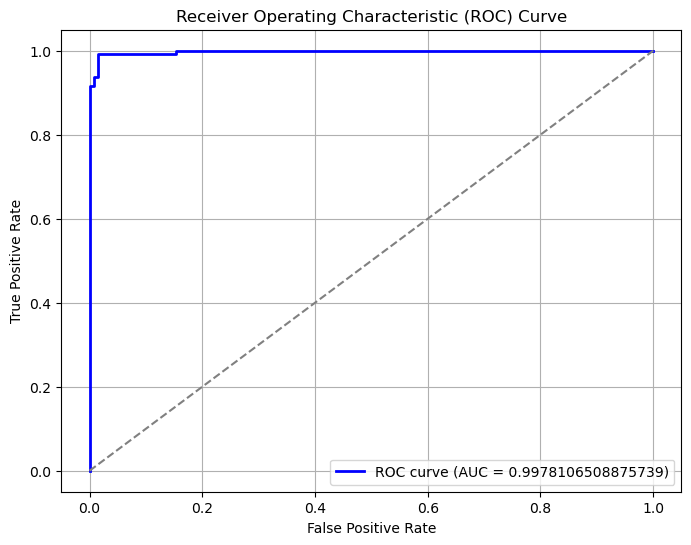

In [14]:
# In this section enter your code to TRAIN the model using Naive Bayes algorithm, then PREDICT and then evaluate PERFORMANCE (Accuracy)
# Your code below ...
#
#
#
# Your output should look like below if your code is right

print("Training Model using Multinomial Naïve Bayes algorithm .....")
model = MultinomialNB()
model.fit(features_matrix, labels)
print("Training completed")

print("Testing trained model to predict Test Data labels")
predicted_labels = model.predict(test_features_matrix)
predicted_probs = model.predict_proba(test_features_matrix)[:, 1] #Getting probabilities for positive class
print("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

performance_metrics(test_labels, predicted_labels, predicted_probs)

======================= END OF PROGRAM =========================